### Imagina que trabajas en un prestigioso laboratorio de biotecnología que está a la vanguardia en la investigación de resistencia a antibióticos. El director del laboratorio te ha asignado una misión crítica: analizar los datos de resistencia a antibióticos en diferentes cepas bacterianas recolectados de diversos hospitales en el último año. Estos datos incluyen la concentración mínima inhibitoria (MIC) para varios antibióticos, proporcionando una visión detallada sobre cómo diferentes cepas responden a los tratamientos actuales. La resistencia a antibióticos es un problema global creciente y tu análisis podría proporcionar información clave para desarrollar tratamientos más efectivos y salvar vidas.

### Tu tarea es desarrollar un análisis exhaustivo en Python que permita importar y examinar un conjunto de datos sobre la resistencia a antibióticos, y calcular estadísticas descriptivas. Este análisis ayudará a entender la resistencia actual y también contribuirá a estrategias futuras en la lucha contra infecciones bacterianas resistentes.

### Lo que el programa debe realizar es:
### Importar y explorar el conjunto de datos.
### Calcular las medidas de locación (media, mediana, moda) para la MIC de cada antibiótico.
### Calcular las medidas de variabilidad (varianza, desviación estándar) para la MIC de cada antibiótico.
### Identificar y tratar valores atípicos.


In [8]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
# Cargar los datos
df = pd.read_csv("S01_Postwork (Dataset)_Estudio de resistencia a antibióticos(in).csv")

# Revisar las primeras filas del DataFrame
print(df.head())


    Cepas  Antibiotico_1_MIC  Antibiotico_2_MIC  Antibiotico_3_MIC
0  Cepa_1                  7                  4                  8
1  Cepa_1                  5                  7                  3
2  Cepa_1                  7                  8                  5
3  Cepa_1                  4                  8                  8
4  Cepa_1                  3                  6                  5


In [10]:
# Información básica sobre el DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cepas              1500 non-null   object
 1   Antibiotico_1_MIC  1500 non-null   int64 
 2   Antibiotico_2_MIC  1500 non-null   int64 
 3   Antibiotico_3_MIC  1500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 47.0+ KB
None


In [11]:
# Verificar la presencia de valores nulos
print(df.isnull().sum())

Cepas                0
Antibiotico_1_MIC    0
Antibiotico_2_MIC    0
Antibiotico_3_MIC    0
dtype: int64


In [13]:
# Selección de columnas con MIC para cada antibiótico
antibiotics_columns = ['Antibiotico_1_MIC', 'Antibiotico_2_MIC', 'Antibiotico_3_MIC']  # Cambiar según las columnas reales

# Calcular la media, mediana y moda para cada antibiótico
for col in antibiotics_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    
    print(f"Antibiótico {col}:")
    print(f"Media: {mean}")
    print(f"Mediana: {median}")
    print(f"Moda: {mode}")
    print("-" * 30)



Antibiótico Antibiotico_1_MIC:
Media: 5.0
Mediana: 5.0
Moda: 1
------------------------------
Antibiótico Antibiotico_2_MIC:
Media: 4.989333333333334
Mediana: 5.0
Moda: 8
------------------------------
Antibiótico Antibiotico_3_MIC:
Media: 4.954
Mediana: 5.0
Moda: 6
------------------------------


In [15]:
# Calcular varianza y desviación estándar para cada antibiótico
for col in antibiotics_columns:
    variance = df[col].var()
    std_dev = df[col].std()
    
    print(f"Antibiótico {col}:")
    print(f"Varianza: {variance}")
    print(f"Desviación estándar: {std_dev}")
    print("-" * 30)


Antibiótico Antibiotico_1_MIC:
Varianza: 6.688458972648433
Desviación estándar: 2.5862055163208573
------------------------------
Antibiótico Antibiotico_2_MIC:
Varianza: 6.7804064932177
Desviación estándar: 2.603921368478261
------------------------------
Antibiótico Antibiotico_3_MIC:
Varianza: 6.637642428285524
Desviación estándar: 2.5763622471006524
------------------------------


In [14]:
# Función para identificar valores atípicos utilizando IQR
def detectar_outliers_iqr(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    
    return outliers

# Detectar outliers para cada antibiótico
for col in antibiotics_columns:
    outliers = detectar_outliers_iqr(col)
    print(f"Valores atípicos en {col}:")
    print(outliers)
    print("-" * 30)


Valores atípicos en Antibiotico_1_MIC:
Empty DataFrame
Columns: [Cepas, Antibiotico_1_MIC, Antibiotico_2_MIC, Antibiotico_3_MIC]
Index: []
------------------------------
Valores atípicos en Antibiotico_2_MIC:
Empty DataFrame
Columns: [Cepas, Antibiotico_1_MIC, Antibiotico_2_MIC, Antibiotico_3_MIC]
Index: []
------------------------------
Valores atípicos en Antibiotico_3_MIC:
Empty DataFrame
Columns: [Cepas, Antibiotico_1_MIC, Antibiotico_2_MIC, Antibiotico_3_MIC]
Index: []
------------------------------


In [ ]:
# Tratar los valores atípicos eliminándolos
def eliminar_outliers_iqr(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    df_sin_outliers = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    
    return df_sin_outliers

# Aplicar la eliminación de outliers a cada columna
for col in antibiotics_columns:
    df = eliminar_outliers_iqr(col)

print("Datos después de eliminar valores atípicos:")
print(df.describe())


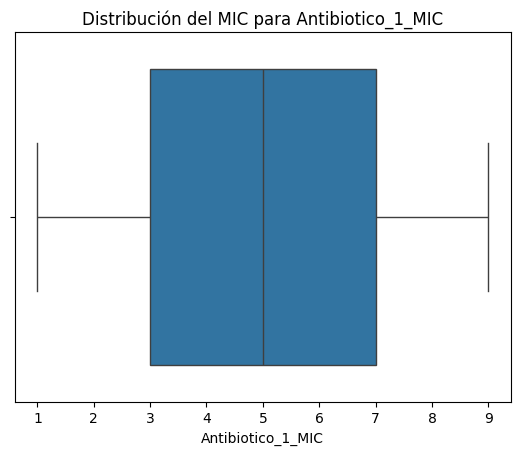

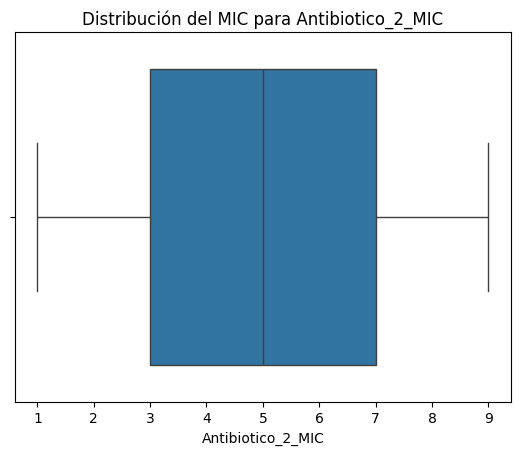

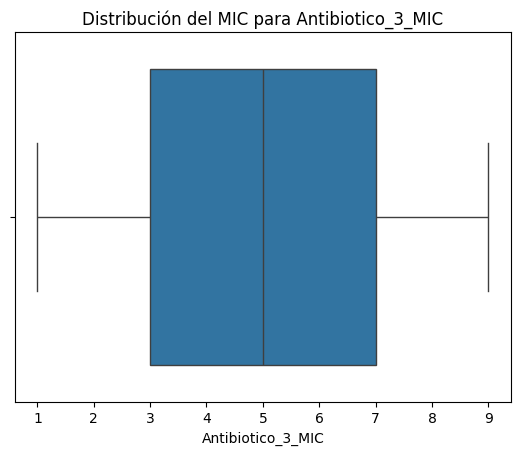

In [16]:
# Boxplot para cada antibiótico
for col in antibiotics_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Distribución del MIC para {col}")
    plt.show()
